# Overfitting and Local Ricci Evolution Coefficients

In this notebook, we evaluate the evolution of the local Ricci evolution coefficients during training of feed-forward neural networks. We begin by importing the necessary packages. 

In [9]:
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import numpy as np
import torch
import os
import sys

sys.path.append(os.path.abspath('..'))
from neural_networks import DNN
from ricci_coefficients import Ricci_Coefficients
from helpers import train_model_with_ricci_coefs
from datasets import DatasetFactory

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

num_iterations = 3      # Number of iterations used for averaging results

Using mps device


# 1. MNIST 1 vs. 7

In [ ]:
# Load datasets
X_train_MNIST_17,y_train_MNIST_17, X_test_MNIST_17, y_test_MNIST_17 = DatasetFactory.load_MNIST(digits=(1,7))

train_accs, test_accs, ricci_coefs = [], [], []     # Overall results 
for i in tqdm(range(num_iterations)):
    # Initialize model
    model = DNN(input_dimension=784, hidden_units=50, depth=7, vision_model=True)
    train_accuracies_MNIST_17, test_accuracies_MNIST_17, ricci_coeficients_MNIST_17 = train_model_with_ricci_coefs(
        epochs=60,
        model=model,
        X_train=X_train_MNIST_17,
        y_train=y_train_MNIST_17,
        X_test=X_test_MNIST_17,
        y_test=y_test_MNIST_17,
        calculate_ricci_coefs_every=10,
        k=50,
        curv="Approx-Ollivier-Ricci",
        ver
    )
    train_accs.append(train_accuracies_MNIST_17)
    test_accs.append(test_accuracies_MNIST_17)
    ricci_coefs.append(ricci_coeficients_MNIST_17)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 | Train accuracy: 48.17% | Test accuracy: 50.00% 
Epoch: 10 | Train accuracy: 48.17% | Test accuracy: 50.00% 
Epoch: 20 | Train accuracy: 98.10% | Test accuracy: 95.90% 


KeyboardInterrupt: 

In [14]:
train_accs = np.array(train_accs).mean(axis=0)
test_accs = np.array(test_accs).mean(axis=0)
mean_ricci_coefs = []
std_ricci_coefs = []
for i in range(num_iterations):
    mean_ricci_coefs.append([np.nanmean(ricci_coefs[i][j]) for j in range(len(ricci_coefs[i]))])
    std_ricci_coefs.append([np.nanvar(ricci_coefs[i][j]) for j in range(len(ricci_coefs[i]))])
mean_ricci_coefs = np.array(mean_ricci_coefs).mean(axis=0)
std_ricci_coefs = np.array(std_ricci_coefs).std(axis=0)

TypeError: object of type 'numpy.float64' has no len()

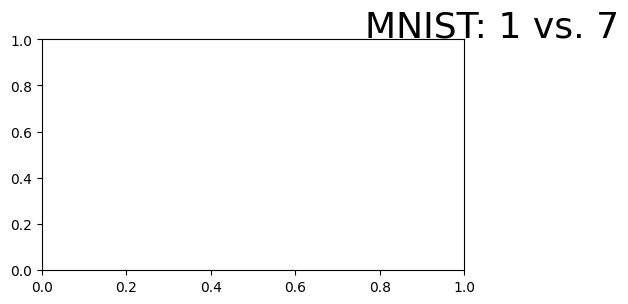

In [ ]:
fig = plt.figure(figsize=(12, 3))
fig.suptitle('MNIST: 1 vs. 7', fontsize=26)

# First plot
ax1 = fig.add_subplot(121)
ax1.plot(10 * np.arange(len(train_accs)), train_accs, label="Train")
ax1.plot(10 * np.arange(len(test_accs)), test_accs, label="Test")
ax1.legend(fontsize=16)
ax1.set_xlabel("Epochs", fontsize=16)
ax1.set_ylabel("Accuracy", fontsize=16)

ax2 = fig.add_subplot(122)
ax2.plot(10 * np.arange(len(mean_ricci_coefs)), mean_ricci_coefs)
ax2.fill_between(10 * np.arange(len(mean_ricci_coefs)), mean_ricci_coefs - std_ricci_coefs, mean_ricci_coefs + std_ricci_coefs, color='blue', alpha=0.2)
ax2.set_xlabel("Epochs", fontsize=16)
ax2.set_ylabel("Avg. local Ricci coef.", fontsize=16)

# fig.suptitle('Fashion-MNIST: Shirt vs. Dress', fontsize=26)
fig.tight_layout()
# plt.savefig("../plots/training_dynamics_MNIST_1v7.png", bbox_inches='tight', dpi=300)

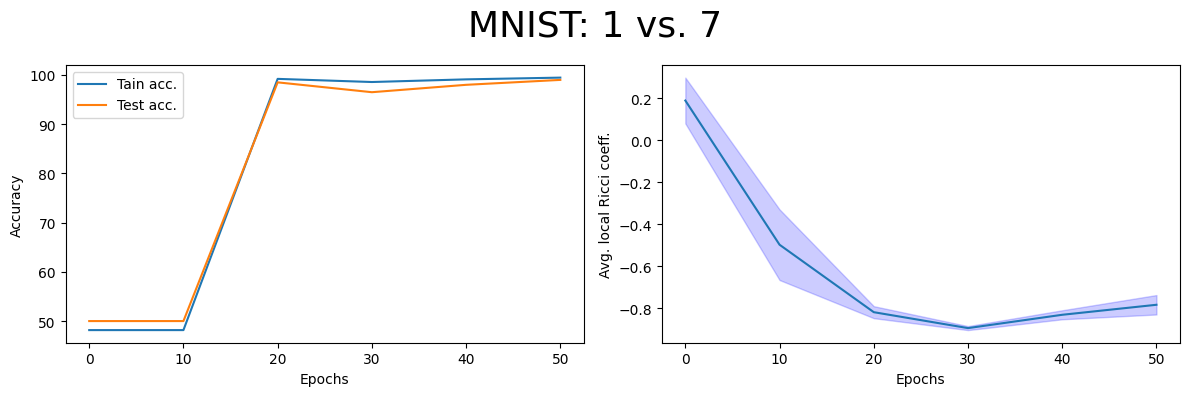

In [5]:
fig = plt.figure(figsize=(12, 4))

# First plot
ax1 = fig.add_subplot(121)
ax1.plot(10 * np.arange(len(train_accuracies_MNIST_17)), train_accuracies_MNIST_17, label="Tain acc.")
ax1.plot(10 * np.arange(len(test_accuracies_MNIST_17)), test_accuracies_MNIST_17, label="Test acc.")
ax1.legend()
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")

mean = np.array([np.nanmean(ricci_coeficients_MNIST_17[i]) for i in range(len(ricci_coeficients_MNIST_17))])
var = np.array([np.nanvar(ricci_coeficients_MNIST_17[i]) for i in range(len(ricci_coeficients_MNIST_17))])
ax2 = fig.add_subplot(122)
ax2.plot(10 * np.arange(len(ricci_coeficients_MNIST_17)), mean)
ax2.fill_between(10 * np.arange(len(ricci_coeficients_MNIST_17)), mean - var, mean + var, color='blue', alpha=0.2)
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Avg. local Ricci coeff.")

fig.suptitle('MNIST: 1 vs. 7', fontsize=26)
fig.tight_layout()
# plt.savefig("../plots/training_dynamics_MNIST_1v7.png", bbox_inches='tight')

# 2. MNIST 6 vs. 9

In [67]:
X_train_MNIST_69,y_train_MNIST_69, X_test_MNIST_69, y_test_MNIST_69 = DatasetFactory.load_MNIST(digits=(6,9))
model = DNN(input_dimension=784, hidden_units=50, depth=7, vision_model=True)
train_accuracies_MNIST_69, test_accuracies_MNIST_69, ricci_coeficients_MNIST_69 = train_model_with_ricci_coefs(
    epochs=60,
    model=model,
    X_train=X_train_MNIST_69,
    y_train=y_train_MNIST_69,
    X_test=X_test_MNIST_69,
    y_test=y_test_MNIST_69,
    calculate_ricci_coefs_every=10,
    k=50,
    curv="Approx-Ollivier-Ricci"
)

Epoch: 0 | Train accuracy: 49.87% | Test accuracy: 50.00% 
Epoch: 10 | Train accuracy: 94.40% | Test accuracy: 90.40% 
Epoch: 20 | Train accuracy: 99.71% | Test accuracy: 99.10% 
Epoch: 30 | Train accuracy: 99.63% | Test accuracy: 99.30% 
Epoch: 40 | Train accuracy: 99.75% | Test accuracy: 99.10% 
Epoch: 50 | Train accuracy: 99.78% | Test accuracy: 99.20% 


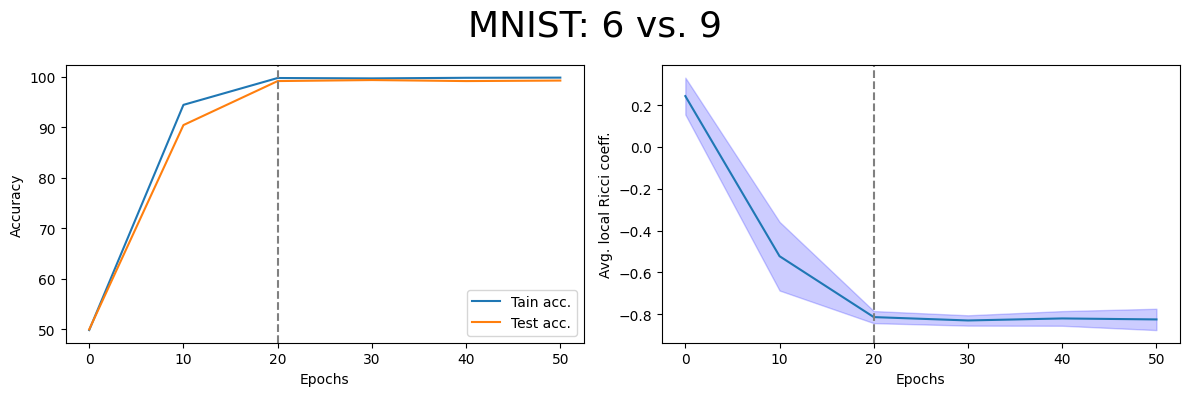

In [ ]:
fig = plt.figure(figsize=(12, 4))

# First plot
ax1 = fig.add_subplot(121)
ax1.plot(10 * np.arange(len(train_accuracies_MNIST_69)), train_accuracies_MNIST_69, label="Tain acc.")
ax1.plot(10 * np.arange(len(test_accuracies_MNIST_69)), test_accuracies_MNIST_69, label="Test acc.")
ax1.legend()
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")

mean = np.array([np.nanmean(ricci_coeficients_MNIST_69[i]) for i in range(len(ricci_coeficients_MNIST_69))])
var = np.array([np.nanvar(ricci_coeficients_MNIST_69[i]) for i in range(len(ricci_coeficients_MNIST_69))])
ax2 = fig.add_subplot(122)
ax2.plot(10 * np.arange(len(ricci_coeficients_MNIST_69)), mean)
ax2.fill_between(10 * np.arange(len(ricci_coeficients_MNIST_69)), mean - var, mean + var, color='blue', alpha=0.2)
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Avg. local Ricci coeff.")

fig.suptitle('MNIST: 6 vs. 9', fontsize=26)
fig.tight_layout()
# plt.savefig("../plots/training_dynamics_MNIST_6v9.png", bbox_inches='tight')

# 3. Fashion MNIST Shoes

In [70]:
X_train_fMNIST_shoes,y_train_fMNIST_shoes, X_test_fMNIST_shoes, y_test_fMNIST_shoes = DatasetFactory.load_fMNIST((5,7), device='cpu')

model = DNN(input_dimension=784, hidden_units=50, depth=7, vision_model=True)
train_accuracies_fMNIST_shoes, test_accuracies_fMNIST_shoes, ricci_coeficients_fMNIST_shoes = train_model_with_ricci_coefs(
    epochs=100,
    model=model,
    X_train=X_train_fMNIST_shoes,
    y_train=y_train_fMNIST_shoes,
    X_test=X_test_fMNIST_shoes,
    y_test=y_test_fMNIST_shoes,
    calculate_ricci_coefs_every=10,
    k=50,
    curv="Approx-Ollivier-Ricci"
)

100%|██████████| 26.4M/26.4M [00:09<00:00, 2.72MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 318kB/s]
100%|██████████| 4.42M/4.42M [00:03<00:00, 1.45MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 5.47MB/s]


Epoch: 0 | Train accuracy: 50.00% | Test accuracy: 50.00% 
Epoch: 10 | Train accuracy: 80.00% | Test accuracy: 79.70% 
Epoch: 20 | Train accuracy: 92.12% | Test accuracy: 92.00% 
Epoch: 30 | Train accuracy: 93.68% | Test accuracy: 93.00% 
Epoch: 40 | Train accuracy: 94.91% | Test accuracy: 94.80% 
Epoch: 50 | Train accuracy: 95.49% | Test accuracy: 95.30% 
Epoch: 60 | Train accuracy: 96.23% | Test accuracy: 95.70% 
Epoch: 70 | Train accuracy: 96.69% | Test accuracy: 96.10% 
Epoch: 80 | Train accuracy: 97.04% | Test accuracy: 96.70% 
Epoch: 90 | Train accuracy: 97.24% | Test accuracy: 96.70% 


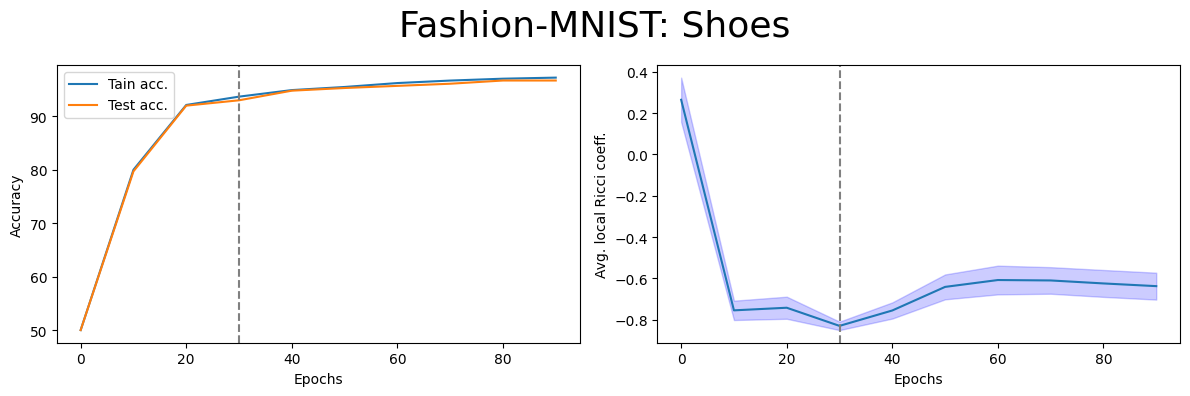

In [ ]:
fig = plt.figure(figsize=(12, 4))

# First plot
ax1 = fig.add_subplot(121)
ax1.plot(10 * np.arange(len(train_accuracies_fMNIST_shoes)), train_accuracies_fMNIST_shoes, label="Tain acc.")
ax1.plot(10 * np.arange(len(test_accuracies_fMNIST_shoes)), test_accuracies_fMNIST_shoes, label="Test acc.")
ax1.legend()
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")

mean = np.array([np.nanmean(ricci_coeficients_fMNIST_shoes[i]) for i in range(len(ricci_coeficients_fMNIST_shoes))])
var = np.array([np.nanvar(ricci_coeficients_fMNIST_shoes[i]) for i in range(len(ricci_coeficients_fMNIST_shoes))])
ax2 = fig.add_subplot(122)
ax2.plot(10 * np.arange(len(ricci_coeficients_fMNIST_shoes)), mean)
ax2.fill_between(10 * np.arange(len(ricci_coeficients_fMNIST_shoes)), mean - var, mean + var, color='blue', alpha=0.2)
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Avg. local Ricci coeff.")

fig.suptitle('Fashion-MNIST: Shoes', fontsize=26)
fig.tight_layout()
# plt.savefig("../plots/training_dynamics_fMNIST_shoes.png", bbox_inches='tight')

# Fashion MNIST Apperal

In [10]:
X_train_fMNIST_apperal,y_train_fMNIST_apperal, X_test_fMNIST_apperal, y_test_fMNIST_apperal = DatasetFactory.load_fMNIST((3,6), device='cpu')


train_accs, test_accs, ricci_coefs = [], [], []
for _ in range(50):
    model = DNN(input_dimension=784, hidden_units=25, depth=7, vision_model=True)
    train_accuracies_fMNIST_apperal, test_accuracies_fMNIST_apperal, ricci_coeficients_fMNIST_apperal = train_model_with_ricci_coefs(
        epochs=100,
        model=model,
        X_train=X_train_fMNIST_apperal,
        y_train=y_train_fMNIST_apperal,
        X_test=X_test_fMNIST_apperal,
        y_test=y_test_fMNIST_apperal,
        calculate_ricci_coefs_every=10,
        k=50,
        curv="Approx-Ollivier-Ricci"
    )
    train_accs.append(train_accuracies_fMNIST_apperal)
    test_accs.append(test_accuracies_fMNIST_apperal)
    ricci_coefs.append(ricci_coeficients_fMNIST_apperal)

Epoch: 0 | Train accuracy: 50.00% | Test accuracy: 50.00% 
Epoch: 10 | Train accuracy: 50.00% | Test accuracy: 50.00% 
Epoch: 20 | Train accuracy: 79.47% | Test accuracy: 80.60% 
Epoch: 30 | Train accuracy: 90.42% | Test accuracy: 88.70% 
Epoch: 40 | Train accuracy: 90.86% | Test accuracy: 89.00% 
Epoch: 50 | Train accuracy: 91.80% | Test accuracy: 90.50% 
Epoch: 60 | Train accuracy: 92.72% | Test accuracy: 92.20% 
Epoch: 70 | Train accuracy: 93.31% | Test accuracy: 92.70% 
Epoch: 80 | Train accuracy: 93.84% | Test accuracy: 92.80% 
Epoch: 90 | Train accuracy: 94.12% | Test accuracy: 93.20% 
Epoch: 0 | Train accuracy: 50.00% | Test accuracy: 50.00% 
Epoch: 10 | Train accuracy: 50.00% | Test accuracy: 50.00% 
Epoch: 20 | Train accuracy: 88.32% | Test accuracy: 87.70% 
Epoch: 30 | Train accuracy: 90.90% | Test accuracy: 89.10% 
Epoch: 40 | Train accuracy: 90.12% | Test accuracy: 89.00% 
Epoch: 50 | Train accuracy: 91.92% | Test accuracy: 90.70% 
Epoch: 60 | Train accuracy: 92.66% | Test 

In [12]:
train_accs = np.array(train_accs)
test_accs = np.array(test_accs)
train_accs.mean(axis=0)

array([50.        , 60.14433333, 74.7795    , 85.06466667, 90.693     ,
       91.99666667, 92.6825    , 93.341     , 93.786     , 94.034     ])

In [15]:
ricci_coefs = np.array(ricci_coefs)
ricci_coefs.shape

(50, 10, 1000)

In [17]:
ricci_coefs[0][0].shape

(1000,)

In [18]:
mean_ricci_coefs = []
std_ricci_coefs = []
for i in range(50):
    mean_ricci_coefs.append([np.nanmean(ricci_coefs[i][j]) for j in range(len(ricci_coefs[i]))])
    std_ricci_coefs.append([np.nanvar(ricci_coefs[i][j]) for j in range(len(ricci_coefs[i]))])
        

In [22]:
mean_ricci_coefs = np.array(mean_ricci_coefs)
std_ricci_coefs = np.array(std_ricci_coefs)
mean_ricci_coefs.shape, std_ricci_coefs.shape

((50, 10), (50, 10))

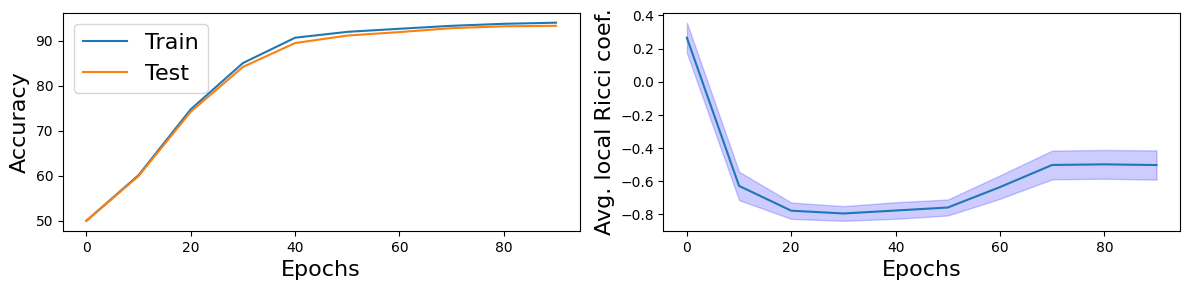

In [ ]:
fig = plt.figure(figsize=(12, 3))

# First plot
ax1 = fig.add_subplot(121)
ax1.plot(10 * np.arange(len(train_accs.mean(axis=0))), train_accs.mean(axis=0), label="Train")
ax1.plot(10 * np.arange(len(test_accs.mean(axis=0))), test_accs.mean(axis=0), label="Test")
# ax1.axvline(x=50, color='gray', linestyle='--')
ax1.legend(fontsize=16)
ax1.set_xlabel("Epochs", fontsize=16)
ax1.set_ylabel("Accuracy", fontsize=16)

ax2 = fig.add_subplot(122)
ax2.plot(10 * np.arange(len(mean_ricci_coefs.mean(axis=0))), mean_ricci_coefs.mean(axis=0))
ax2.fill_between(10 * np.arange(len(mean_ricci_coefs.mean(axis=0))), mean_ricci_coefs.mean(axis=0) - std_ricci_coefs.mean(axis=0), mean_ricci_coefs.mean(axis=0) + std_ricci_coefs.mean(axis=0), color='blue', alpha=0.2)
# ax2.axvline(x=50, color='gray', linestyle='--')
ax2.set_xlabel("Epochs", fontsize=16)
ax2.set_ylabel("Avg. local Ricci coef.", fontsize=16)

# fig.suptitle('Fashion-MNIST: Shirt vs. Dress', fontsize=26)
fig.tight_layout()
# plt.savefig("../plots/training_dynamics_fMNIST_apperal_avg.png", bbox_inches='tight', dpi=300)

# CIFAR-10

In [91]:
X_train_CIFAR, y_train_CIFAR, X_test_CIFAR, y_test_CIFAR = DatasetFactory.load_CIFAR((0,1))

model = DNN(input_dimension=32*32*3, hidden_units=100, depth=7, vision_model=True)
train_accuracies_CIFAR, test_accuracies_CIFAR, ricci_coeficients_CIFAR = train_model_with_ricci_coefs(
    epochs=100,
    model=model,
    X_train=X_train_CIFAR,
    y_train=y_train_CIFAR,
    X_test=X_test_CIFAR,
    y_test=y_test_CIFAR,
    calculate_ricci_coefs_every=10,
    k=50,
    curv="Approx-Ollivier-Ricci"
)

Epoch: 0 | Train accuracy: 50.00% | Test accuracy: 50.00% 
Epoch: 10 | Train accuracy: 65.82% | Test accuracy: 67.90% 
Epoch: 20 | Train accuracy: 72.43% | Test accuracy: 72.90% 
Epoch: 30 | Train accuracy: 77.50% | Test accuracy: 78.50% 
Epoch: 40 | Train accuracy: 78.61% | Test accuracy: 79.60% 
Epoch: 50 | Train accuracy: 79.26% | Test accuracy: 79.80% 
Epoch: 60 | Train accuracy: 80.63% | Test accuracy: 81.00% 
Epoch: 70 | Train accuracy: 78.96% | Test accuracy: 80.60% 
Epoch: 80 | Train accuracy: 80.38% | Test accuracy: 81.50% 
Epoch: 90 | Train accuracy: 82.11% | Test accuracy: 82.90% 


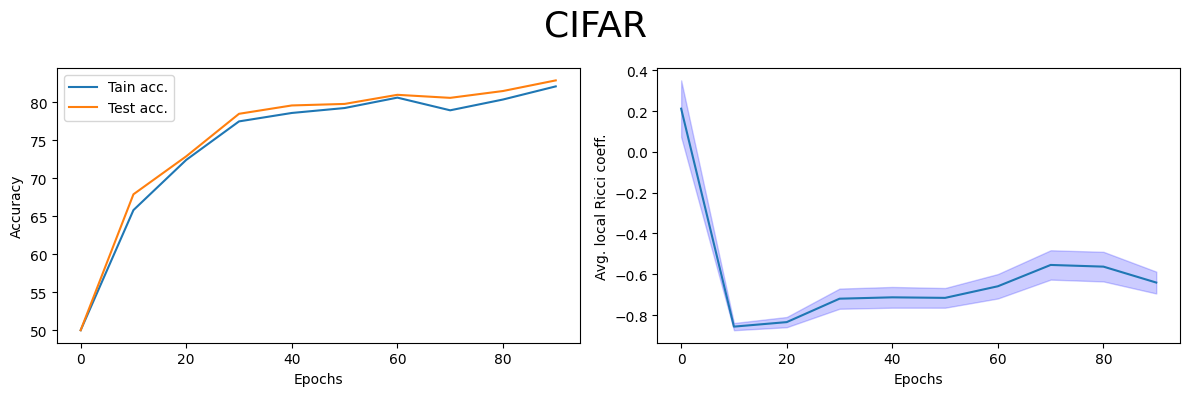

In [93]:
fig = plt.figure(figsize=(12,4))

# First plot
ax1 = fig.add_subplot(121)
ax1.plot(10 * np.arange(len(train_accuracies_CIFAR)), train_accuracies_CIFAR, label="Tain acc.")
ax1.plot(10 * np.arange(len(test_accuracies_CIFAR)), test_accuracies_CIFAR, label="Test acc.")
# ax1.axvline(x=20, color='gray', linestyle='--')
ax1.legend()
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")

mean = np.array([np.nanmean(ricci_coeficients_CIFAR[i]) for i in range(len(ricci_coeficients_CIFAR))])
var = np.array([np.nanvar(ricci_coeficients_CIFAR[i]) for i in range(len(ricci_coeficients_CIFAR))])
ax2 = fig.add_subplot(122)
ax2.plot(10 * np.arange(len(ricci_coeficients_CIFAR)), mean)
ax2.fill_between(10 * np.arange(len(ricci_coeficients_CIFAR)), mean - var, mean + var, color='blue', alpha=0.2)
# ax2.axvline(x=20, color='gray', linestyle='--')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Avg. local Ricci coeff.")

fig.suptitle('CIFAR', fontsize=26)
fig.tight_layout()
# plt.savefig("../plots/training_dynamics_CIFAR.png", bbox_inches='tight')